# 4. Merging species counts tables into one counts table for all species

In [1]:
import os
import pandas as pd
import numpy as np
# requires dammit env
# source activate dammit
from dammit.fileio.gff3 import GFF3Parser
%matplotlib inline
import pylab as plt
from matplotlib_venn import venn2

In [4]:
gene_out_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/contig_gene_name_16Oct2018_filtnew/"
genes_matrices = os.listdir(gene_out_dir)
print(genes_matrices)

['F_diaphanus_gene_counts_annotations_filt.csv', 'A_xenica_gene_counts_annotations_filt.csv', 'F_catanatus_gene_counts_annotations_filt.csv', 'L_goodei_gene_counts_annotations_filt.csv', 'F_heteroclitusMDPP_gene_counts_annotations_filt.csv', 'L_parva_gene_counts_annotations_filt.csv', 'F_sciadicus_gene_counts_annotations_filt.csv', 'F_notatus_gene_counts_annotations_filt.csv', 'F_rathbuni_gene_counts_annotations_filt.csv', 'F_heteroclitusMDPL_gene_counts_annotations_filt.csv', 'F_olivaceus_gene_counts_annotations_filt.csv', 'F_grandis_gene_counts_annotations_filt.csv', 'F_chrysotus_gene_counts_annotations_filt.csv', 'F_zebrinus_gene_counts_annotations_filt.csv', 'F_similis_gene_counts_annotations_filt.csv', 'F_nottii_gene_counts_annotations_filt.csv', 'F_parvapinis_gene_counts_annotations_filt.csv']


In [7]:
test = pd.read_csv(gene_out_dir + 'F_diaphanus_gene_counts_annotations_filt.csv')
test.head()

,NCBIproteinID,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant
0,XP_012704699.1,93.000000,116.000000,122.000001,153.00000,179.000000,50.000000
1,XP_012704700.1,200.000001,311.000000,245.999999,309.00000,540.000000,183.999999
2,XP_012704702.1,305.000000,390.000000,327.000000,518.00000,737.097762,234.000000
3,XP_012704703.1,322.678143,470.445543,459.533704,487.33287,513.970755,268.999999
4,XP_012704709.1,275.000000,402.000000,246.000000,446.00000,710.000001,253.000001


17588


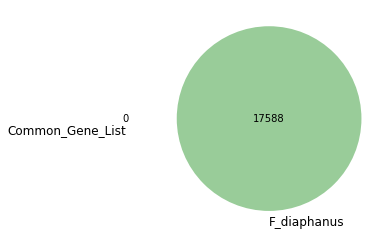

20497


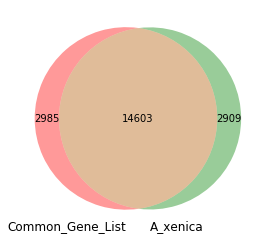

22311


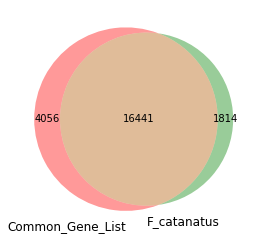

23596


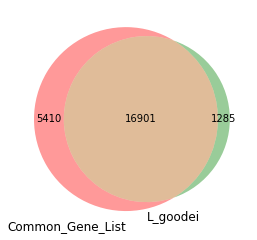

24572


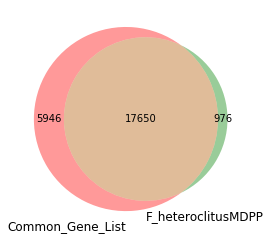

25211


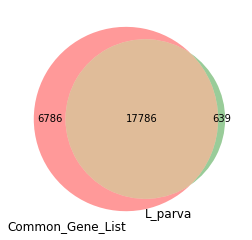

25541


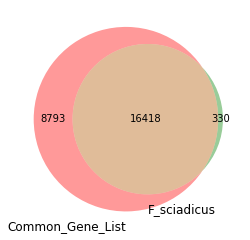

25954


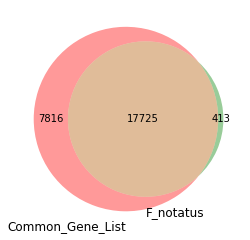

26267


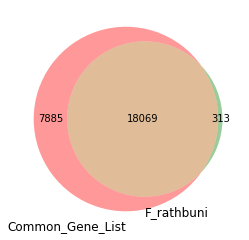

26579


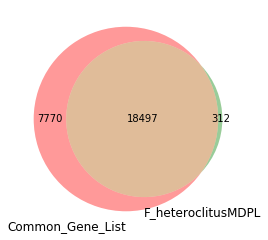

26757


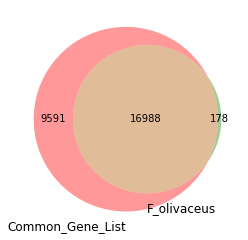

27198


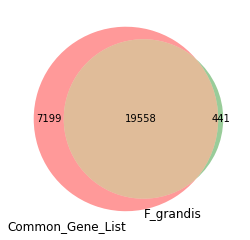

27375


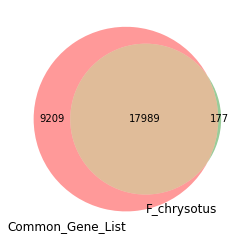

27480


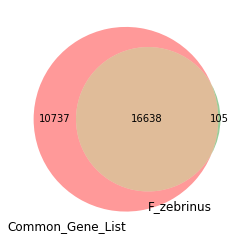

27590


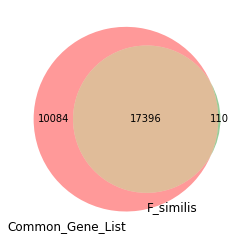

27685


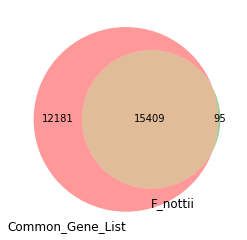

27775


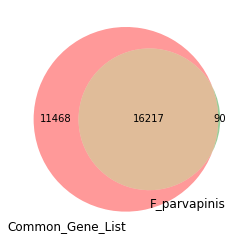

In [8]:
gene_list_common = []
# construct common gene list (union)
for genes_file in genes_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(gene_out_dir+genes_file)
        species_genes = table['NCBIproteinID'].tolist()
        a = set(species_genes)
        b = set(gene_list_common)
        gene_list_common = list(a | b)
        print(len(gene_list_common))
        gene_list_common.extend(gene_list_common)
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()
# construct unique gene list ()

In [9]:
print(len(gene_list_common))
print(len(set(gene_list_common)))

55550
27775


17588


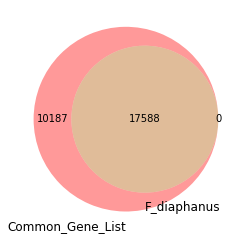

17512


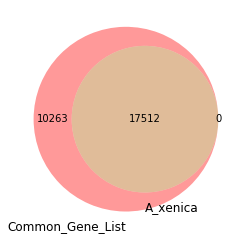

18255


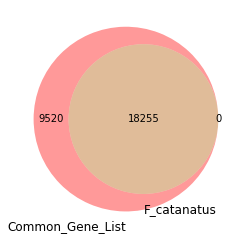

18186


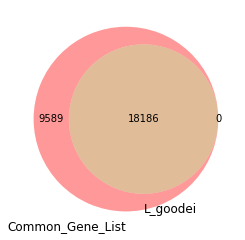

18626


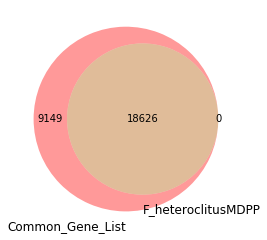

18425


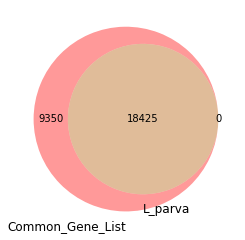

16748


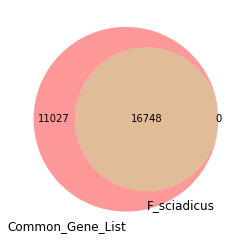

18138


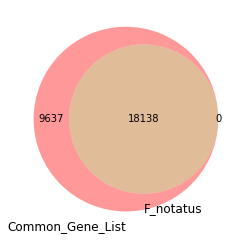

18382


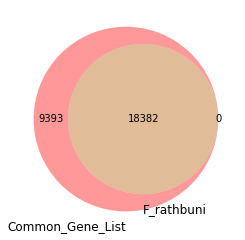

18809


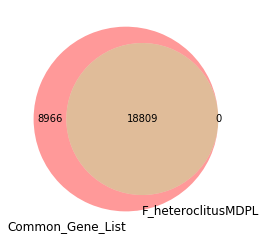

17166


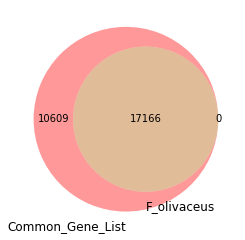

19999


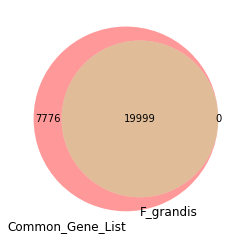

18166


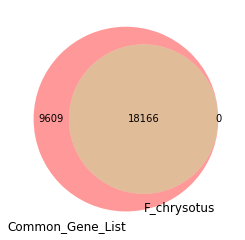

16743


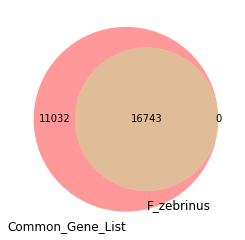

17506


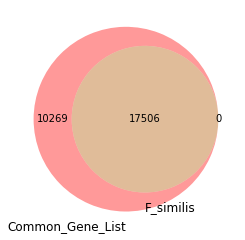

15504


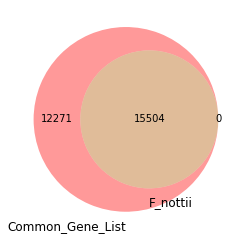

16307


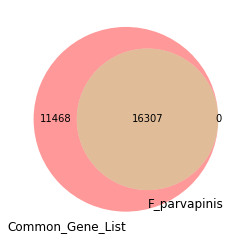

In [11]:
for genes_file in genes_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(gene_out_dir+genes_file)
        species_genes = table['NCBIproteinID'].tolist()
        a = set(species_genes)
        b = set(gene_list_common)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [12]:
print(genes_matrices)
print(len(genes_matrices))

['F_diaphanus_gene_counts_annotations_filt.csv', 'A_xenica_gene_counts_annotations_filt.csv', 'F_catanatus_gene_counts_annotations_filt.csv', 'L_goodei_gene_counts_annotations_filt.csv', 'F_heteroclitusMDPP_gene_counts_annotations_filt.csv', 'L_parva_gene_counts_annotations_filt.csv', 'F_sciadicus_gene_counts_annotations_filt.csv', 'F_notatus_gene_counts_annotations_filt.csv', 'F_rathbuni_gene_counts_annotations_filt.csv', 'F_heteroclitusMDPL_gene_counts_annotations_filt.csv', 'F_olivaceus_gene_counts_annotations_filt.csv', 'F_grandis_gene_counts_annotations_filt.csv', 'F_chrysotus_gene_counts_annotations_filt.csv', 'F_zebrinus_gene_counts_annotations_filt.csv', 'F_similis_gene_counts_annotations_filt.csv', 'F_nottii_gene_counts_annotations_filt.csv', 'F_parvapinis_gene_counts_annotations_filt.csv']
17


In [13]:
count = 0
gene_list_common = []
for genes_file1 in genes_matrices:
    if genes_file1 != ".DS_Store":
        species1 = genes_file1.split("_")[0]+"_"+genes_file1.split("_")[1]
        for genes_file2 in genes_matrices:
            if genes_file2 != genes_file1:
                if genes_file2 != ".DS_Store":
                    species2 = genes_file2.split("_")[0]+"_"+genes_file2.split("_")[1]
                    table1 = pd.read_csv(gene_out_dir+genes_file1)
                    table2 = pd.read_csv(gene_out_dir+genes_file2)
                    species_genes1 = table1['NCBIproteinID'].tolist()
                    species_genes2 = table2['NCBIproteinID'].tolist()
                    a = set(species_genes1)
                    b = set(species_genes2)
                    genes_list = list(a | b)
                    print(len(genes_list))
                    gene_list_common.extend(genes_list)
#difference=filter(lambda x:x not in list2,list1)

20497
20860
20974
21109
21244
20133
20994
20877
21178
20391
22095
20978
19987
20433
19786
20075
20497
20889
20888
21123
21091
20083
20809
21056
21138
20251
22073
20853
20044
20325
19754
20063
20860
20889
21421
21544
21534
20608
21274
21297
21585
20754
22339
21272
20552
20881
20311
20625
20974
20888
21421
21630
20965
20685
21327
21549
21643
20820
22511
21278
20537
20963
20414
20568
21109
21123
21544
21630
21815
20933
21538
21636
21244
21093
22344
21648
20838
21026
20600
20781
21244
21091
21534
20965
21815
20906
21442
21639
21800
20985
22621
21365
20837
21183
20633
20798
20133
20083
20608
20685
20933
20906
20524
20802
20930
19769
21938
20539
19461
20019
19079
19506
20994
20809
21274
21327
21538
21442
20524
21321
21540
20394
22335
21151
20495
20833
20201
20505
20877
21056
21297
21549
21636
21639
20802
21321
21636
20919
22370
21397
20742
21042
20589
20701
21178
21138
21585
21643
21244
21800
20930
21540
21636
21027
22329
21698
20926
21125
20679
20955
20391
20251
20754
20820
21093
20985
1976

In [14]:
gene_list_common_intersect = gene_list_common
print(len(gene_list_common_intersect))
print(len(set(gene_list_common)))
gene_list_common = list(set(gene_list_common))

5686120
27775


17588


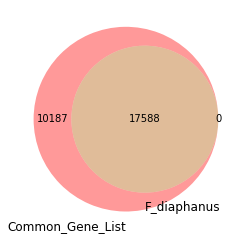

17512


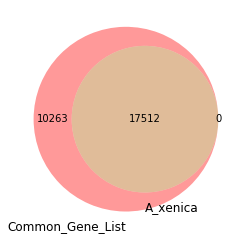

18255


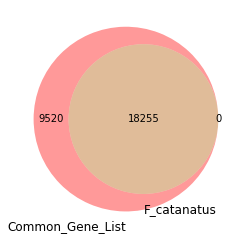

18186


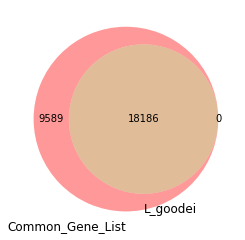

18626


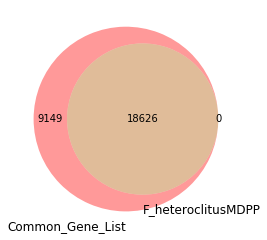

18425


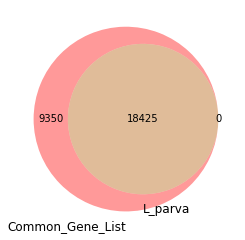

16748


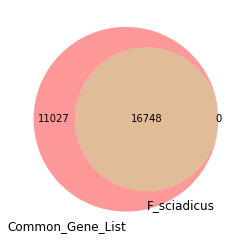

18138


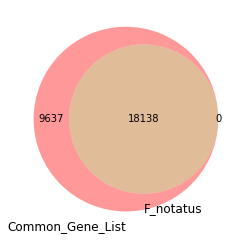

18382


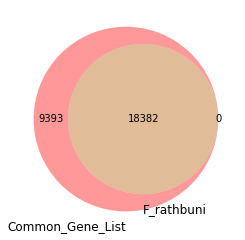

18809


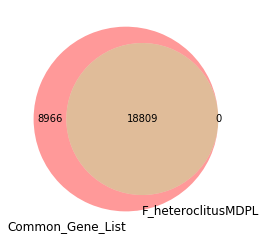

17166


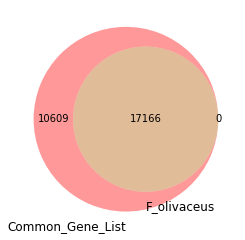

19999


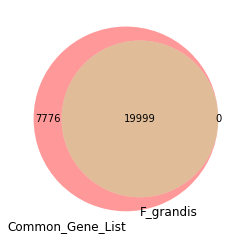

18166


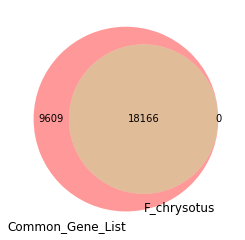

16743


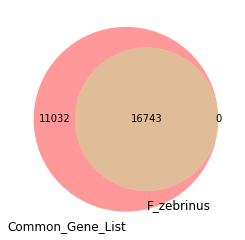

17506


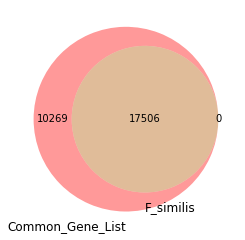

15504


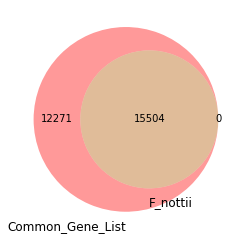

16307


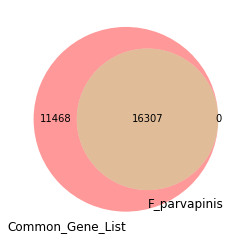

In [15]:
for genes_file in genes_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(gene_out_dir+genes_file)
        species_genes = table['NCBIproteinID'].tolist()
        a = set(species_genes)
        b = set(gene_list_common_intersect)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [10]:
species_counts = pd.DataFrame()
species_counts['NCBIproteinID'] = ""  
for genes_file in genes_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        print("========")
        print(species)
        print("========")
        table = pd.read_csv(gene_out_dir+genes_file)
        #table_short = table[['GeneName']]
        table_short = table.drop('Note',1)
        table_short = table_short.drop('database',1)
        table_short = table_short.drop('Dbxref',1)
        table_short = table_short.drop('annotationStart',1)
        table_short = table_short.drop('annotationEnd',1)
        table_short = table_short.drop('annotationLength',1)
        table_short = table_short.drop('FhetNCBIName',1)
        table_short = table_short.drop('FhetNCBIStart',1)
        table_short = table_short.drop('FhetNCBIEnd',1)
        table_short = table_short.drop('FhetNCBILength',1)
        table_short = table_short.drop('NCBIproteinID',1)
        table_short = table_short.drop('NCBIproteinName',1)
        table_short = table_short.drop('Unnamed: 0',1)
        table_short = table_short.drop('TrinityGene',1)
        table_short = table_short.drop('dammitSeqID',1)
        table_short = table_short.drop('TrinityContig',1)
        #df[df['A'].isin([3, 6])]
        #species_counts = pd.merge(species_counts,table_short,on='GeneName',how='outer')
        counts = table_short[table_short['NCBIproteinID'].isin(gene_list_common)]
        species_counts = pd.merge(species_counts,counts,on='NCBIproteinID',how='outer')
        #print(table_short.shape)
        print(species_counts.shape)

F_diaphanus
(19814, 7)
A_xenica
(25442, 16)
F_catanatus
(29919, 23)
L_goodei
(33421, 32)
F_heteroclitusMDPP
(36887, 41)
L_parva
(38805, 50)
F_sciadicus
(40202, 54)
F_notatus
(42088, 63)
F_rathbuni
(43645, 72)
F_heteroclitusMDPL
(45503, 81)
F_olivaceus
(46356, 89)
F_grandis
(48644, 98)
F_chrysotus
(49896, 106)
F_zebrinus
(50653, 110)
F_similis
(51594, 119)
F_nottii
(52305, 121)
F_parvapinis
(53023, 129)


In [11]:
species_counts = species_counts.fillna(0)

In [12]:
cols = species_counts.columns.tolist()
GeneName_position = cols.index('GeneName')
cols = [cols[GeneName_position]] + cols[:GeneName_position] + cols[GeneName_position+1:]
species_counts = species_counts[cols]

In [39]:
species_counts_test = species_counts

In [14]:
species_counts.shape

(53023, 129)

In [34]:
species_counts_test.shape

(53023, 129)

In [16]:
species_counts_test.columns

Index(['GeneName', 'F_diaphanus_BW_1.quant', 'F_diaphanus_BW_2.quant',
       'F_diaphanus_FW_2.quant', 'F_diaphanus_FW_3.quant',
       'F_diaphanus_transfer_1.quant', 'F_diaphanus_transfer_2.quant',
       'A_xenica_BW_1.quant', 'A_xenica_BW_2.quant', 'A_xenica_BW_3.quant',
       ...
       'F_notti_FW_1.quant', 'F_notti_FW_2.quant', 'F_parvapinis_BW_1.quant',
       'F_parvapinis_BW_2.quant', 'F_parvapinis_BW_3.quant',
       'F_parvapinis_FW_1.quant', 'F_parvapinis_FW_2.quant',
       'F_parvapinis_FW_3.quant', 'F_parvapinis_transfer_1.quant',
       'F_parvapinis_transfer_2.quant'],
      dtype='object', length=129)

In [26]:
species_counts.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/16killifish_counts_RNAseq_filtered_20September2018.csv")

In [18]:
cols = cols[1:]

In [19]:
cols

['F_diaphanus_BW_1.quant',
 'F_diaphanus_BW_2.quant',
 'F_diaphanus_FW_2.quant',
 'F_diaphanus_FW_3.quant',
 'F_diaphanus_transfer_1.quant',
 'F_diaphanus_transfer_2.quant',
 'A_xenica_BW_1.quant',
 'A_xenica_BW_2.quant',
 'A_xenica_BW_3.quant',
 'A_xenica_FW_1.quant',
 'A_xenica_FW_2.quant',
 'A_xenica_FW_3.quant',
 'A_xenica_transfer_1.quant',
 'A_xenica_transfer_2.quant',
 'A_xenica_transfer_3.quant',
 'F_catanatus_BW_1.quant',
 'F_catanatus_BW_2.quant',
 'F_catanatus_BW_3.quant',
 'F_catanatus_FW_1.quant',
 'F_catanatus_FW_2.quant',
 'F_catanatus_transfer_1.quant',
 'F_catanatus_transfer_2.quant',
 'L_goodei_BW_1.quant',
 'L_goodei_BW_2.quant',
 'L_goodei_BW_3.quant',
 'L_goodei_FW_1.quant',
 'L_goodei_FW_2.quant',
 'L_goodei_FW_3.quant',
 'L_goodei_transfer_1.quant',
 'L_goodei_transfer_2.quant',
 'L_goodei_transfer_3.quant',
 'F_heteroclitusMDPP_BW_1.quant',
 'F_heteroclitusMDPP_BW_2.quant',
 'F_heteroclitusMDPP_BW_3.quant',
 'F_heteroclitusMDPP_FW_1.quant',
 'F_heteroclitusMDPP_

In [20]:
clade_design = {"A_xenica":"Clade3","F_catanatus":"Clade1","F_chrysotus":"Clade3",
 "F_diaphanus":"Clade1","F_grandis":"Clade1","F_heteroclitusMDPL":"Clade1",
 "F_heteroclitusMDPP":"Clade1","F_notatus":"Clade3","F_notti":"Clade3",
 "F_olivaceous":"Clade3","F_parvapinis":"Clade2","F_rathbuni":"Clade1",
 "F_sciadicus":"Clade3","F_similis":"Clade1","F_zebrinus":"Clade3",
 "L_goodei":"Clade2","L_parva":"Clade2"}
combined_design = {"A_xenica":"M_Clade3","F_catanatus":"FW_Clade1","F_chrysotus":"BW_Clade3",
 "F_diaphanus":"BW_Clade1","F_grandis":"M_Clade1","F_heteroclitusMDPL":"M_Clade1",
 "F_heteroclitusMDPP":"M_Clade1","F_notatus":"FW_Clade3","F_notti":"FW_Clade3",
 "F_olivaceous":"FW_Clade3","F_parvapinis":"BW_Clade2","F_rathbuni":"FW_Clade1",
 "F_sciadicus":"FW_Clade3","F_similis":"M_Clade1","F_zebrinus":"M_Clade3",
 "L_goodei":"FW_Clade2","L_parva":"M_Clade2"}
phys_design = {"A_xenica":"M","F_catanatus":"FW","F_chrysotus":"BW",
 "F_diaphanus":"BW","F_grandis":"M","F_heteroclitusMDPL":"M",
 "F_heteroclitusMDPP":"M","F_notatus":"FW","F_notti":"FW",
 "F_olivaceous":"FW","F_parvapinis":"BW","F_rathbuni":"FW",
 "F_sciadicus":"FW","F_similis":"M","F_zebrinus":"M",
 "L_goodei":"FW","L_parva":"M"}

In [38]:
species_list = ['Empty']
physiology_list = ['Empty']
clade_list = ['Empty']
combined_list = ['Empty']
condition_list = ['Empty']
for col in cols:
    species = col.split("_")[0]+"_"+col.split("_")[1]
    condition = col.split("_")[2]
    if condition == "BW":
        condition = "15_ppt"
    if condition == "FW":
        condition = "0.2_ppt"
    condition_list.append(condition)
    species_list.append(species)
    physiology = phys_design[species]
    physiology_list.append(physiology)
    clade = clade_design[species]
    clade_list.append(clade)
    design = combined_design[species]
    combined_list.append(design)
print(len(species_list))
print(len(physiology_list))
print(len(clade_list))
print(len(combined_list))
print(len(condition_list))

129
129
129
129
129


In [40]:
df = pd.DataFrame([species_list],columns=species_counts.columns)
df2 = pd.DataFrame([physiology_list],columns=species_counts.columns)
df3 = pd.DataFrame([clade_list],columns=species_counts.columns)
df4 = pd.DataFrame([combined_list],columns=species_counts.columns)
df5 = pd.DataFrame([condition_list],columns=species_counts.columns)
print(df.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
#df.head()
species_counts_test = species_counts_test.append(df)
species_counts_test = species_counts_test.append(df2)
species_counts_test = species_counts_test.append(df3)
species_counts_test = species_counts_test.append(df4)
species_counts_test = species_counts_test.append(df5)
print(species_counts_test.shape)

(1, 129)
(1, 129)
(1, 129)
(1, 129)
(1, 129)
(53028, 129)


In [41]:
pd.set_option('display.max_columns',500)
species_counts_test.tail(5)

,GeneName,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant,A_xenica_BW_1.quant,A_xenica_BW_2.quant,A_xenica_BW_3.quant,A_xenica_FW_1.quant,A_xenica_FW_2.quant,A_xenica_FW_3.quant,A_xenica_transfer_1.quant,A_xenica_transfer_2.quant,A_xenica_transfer_3.quant,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant,L_goodei_BW_1.quant,L_goodei_BW_2.quant,L_goodei_BW_3.quant,L_goodei_FW_1.quant,L_goodei_FW_2.quant,L_goodei_FW_3.quant,L_goodei_transfer_1.quant,L_goodei_transfer_2.quant,L_goodei_transfer_3.quant,F_heteroclitusMDPP_BW_1.quant,F_heteroclitusMDPP_BW_2.quant,F_heteroclitusMDPP_BW_3.quant,F_heteroclitusMDPP_FW_1.quant,F_heteroclitusMDPP_FW_2.quant,F_heteroclitusMDPP_FW_3.quant,F_heteroclitusMDPP_transfer_1.quant,F_heteroclitusMDPP_transfer_2.quant,F_heteroclitusMDPP_transfer_3.quant,L_parva_BW_1.quant,L_parva_BW_2.quant,L_parva_BW_3.quant,L_parva_FW_1.quant,L_parva_FW_2.quant,L_parva_FW_3.quant,L_parva_transfer_1.quant,L_parva_transfer_2.quant,L_parva_transfer_3.quant,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,F_notatus_BW_1.quant,F_notatus_BW_2.quant,F_notatus_BW_3.quant,F_notatus_FW_1.quant,F_notatus_FW_2.quant,F_notatus_FW_3.quant,F_notatus_transfer_1.quant,F_notatus_transfer_2.quant,F_notatus_transfer_3.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,F_rathbuni_FW_3.quant,F_rathbuni_transfer_1.quant,F_rathbuni_transfer_2.quant,F_rathbuni_transfer_3.quant,F_heteroclitusMDPL_BW_1.quant,F_heteroclitusMDPL_BW_2.quant,F_heteroclitusMDPL_BW_3.quant,F_heteroclitusMDPL_FW_1.quant,F_heteroclitusMDPL_FW_2.quant,F_heteroclitusMDPL_FW_3.quant,F_heteroclitusMDPL_transfer_1.quant,F_heteroclitusMDPL_transfer_2.quant,F_heteroclitusMDPL_transfer_3.quant,F_olivaceous_BW_1.quant,F_olivaceous_BW_2.quant,F_olivaceous_BW_3.quant,F_olivaceous_FW_1.quant,F_olivaceous_FW_2.quant,F_olivaceous_FW_3.quant,F_olivaceous_transfer_1.quant,F_olivaceous_transfer_2.quant,F_grandis_BW_1.quant,F_grandis_BW_2.quant,F_grandis_BW_3.quant,F_grandis_FW_1.quant,F_grandis_FW_2.quant,F_grandis_FW_3.quant,F_grandis_transfer_1.quant,F_grandis_transfer_2.quant,F_grandis_transfer_3.quant,F_chrysotus_BW_1.quant,F_chrysotus_BW_2.quant,F_chrysotus_BW_3.quant,F_chrysotus_FW_1.quant,F_chrysotus_FW_2.quant,F_chrysotus_FW_3.quant,F_chrysotus_transfer_1.quant,F_chrysotus_transfer_2.quant,F_zebrinus_BW_1.quant,F_zebrinus_BW_2.quant,F_zebrinus_FW_1.quant,F_zebrinus_FW_2.quant,F_similis_BW_1.quant,F_similis_BW_2.quant,F_similis_BW_3.quant,F_similis_FW_1.quant,F_similis_FW_2.quant,F_similis_FW_3.quant,F_similis_transfer_1.quant,F_similis_transfer_2.quant,F_similis_transfer_3.quant,F_notti_FW_1.quant,F_notti_FW_2.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant
0,Empty,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,F_diaphanus,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,A_xenica,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,F_catanatus,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,F_sciadicus,F_sciadicus,F_sciadicus,F_sciadicus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_heteroclitusMDPL,F_heteroclitusMD

In [42]:
species_counts_test.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/16killifish_counts_RNAseq_filtered_20September2018_designfactors.csv")